In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.shape

(214, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


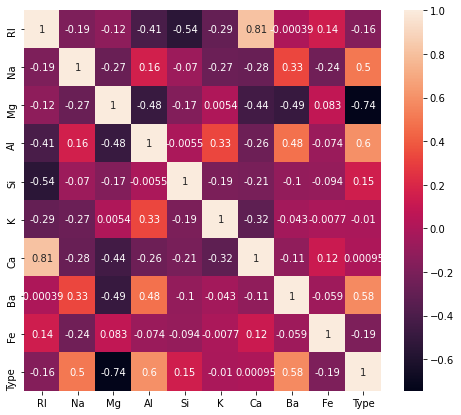

In [6]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
corr_matrix = data.corr()
corr_matrix["Type"].sort_values(ascending = False)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64

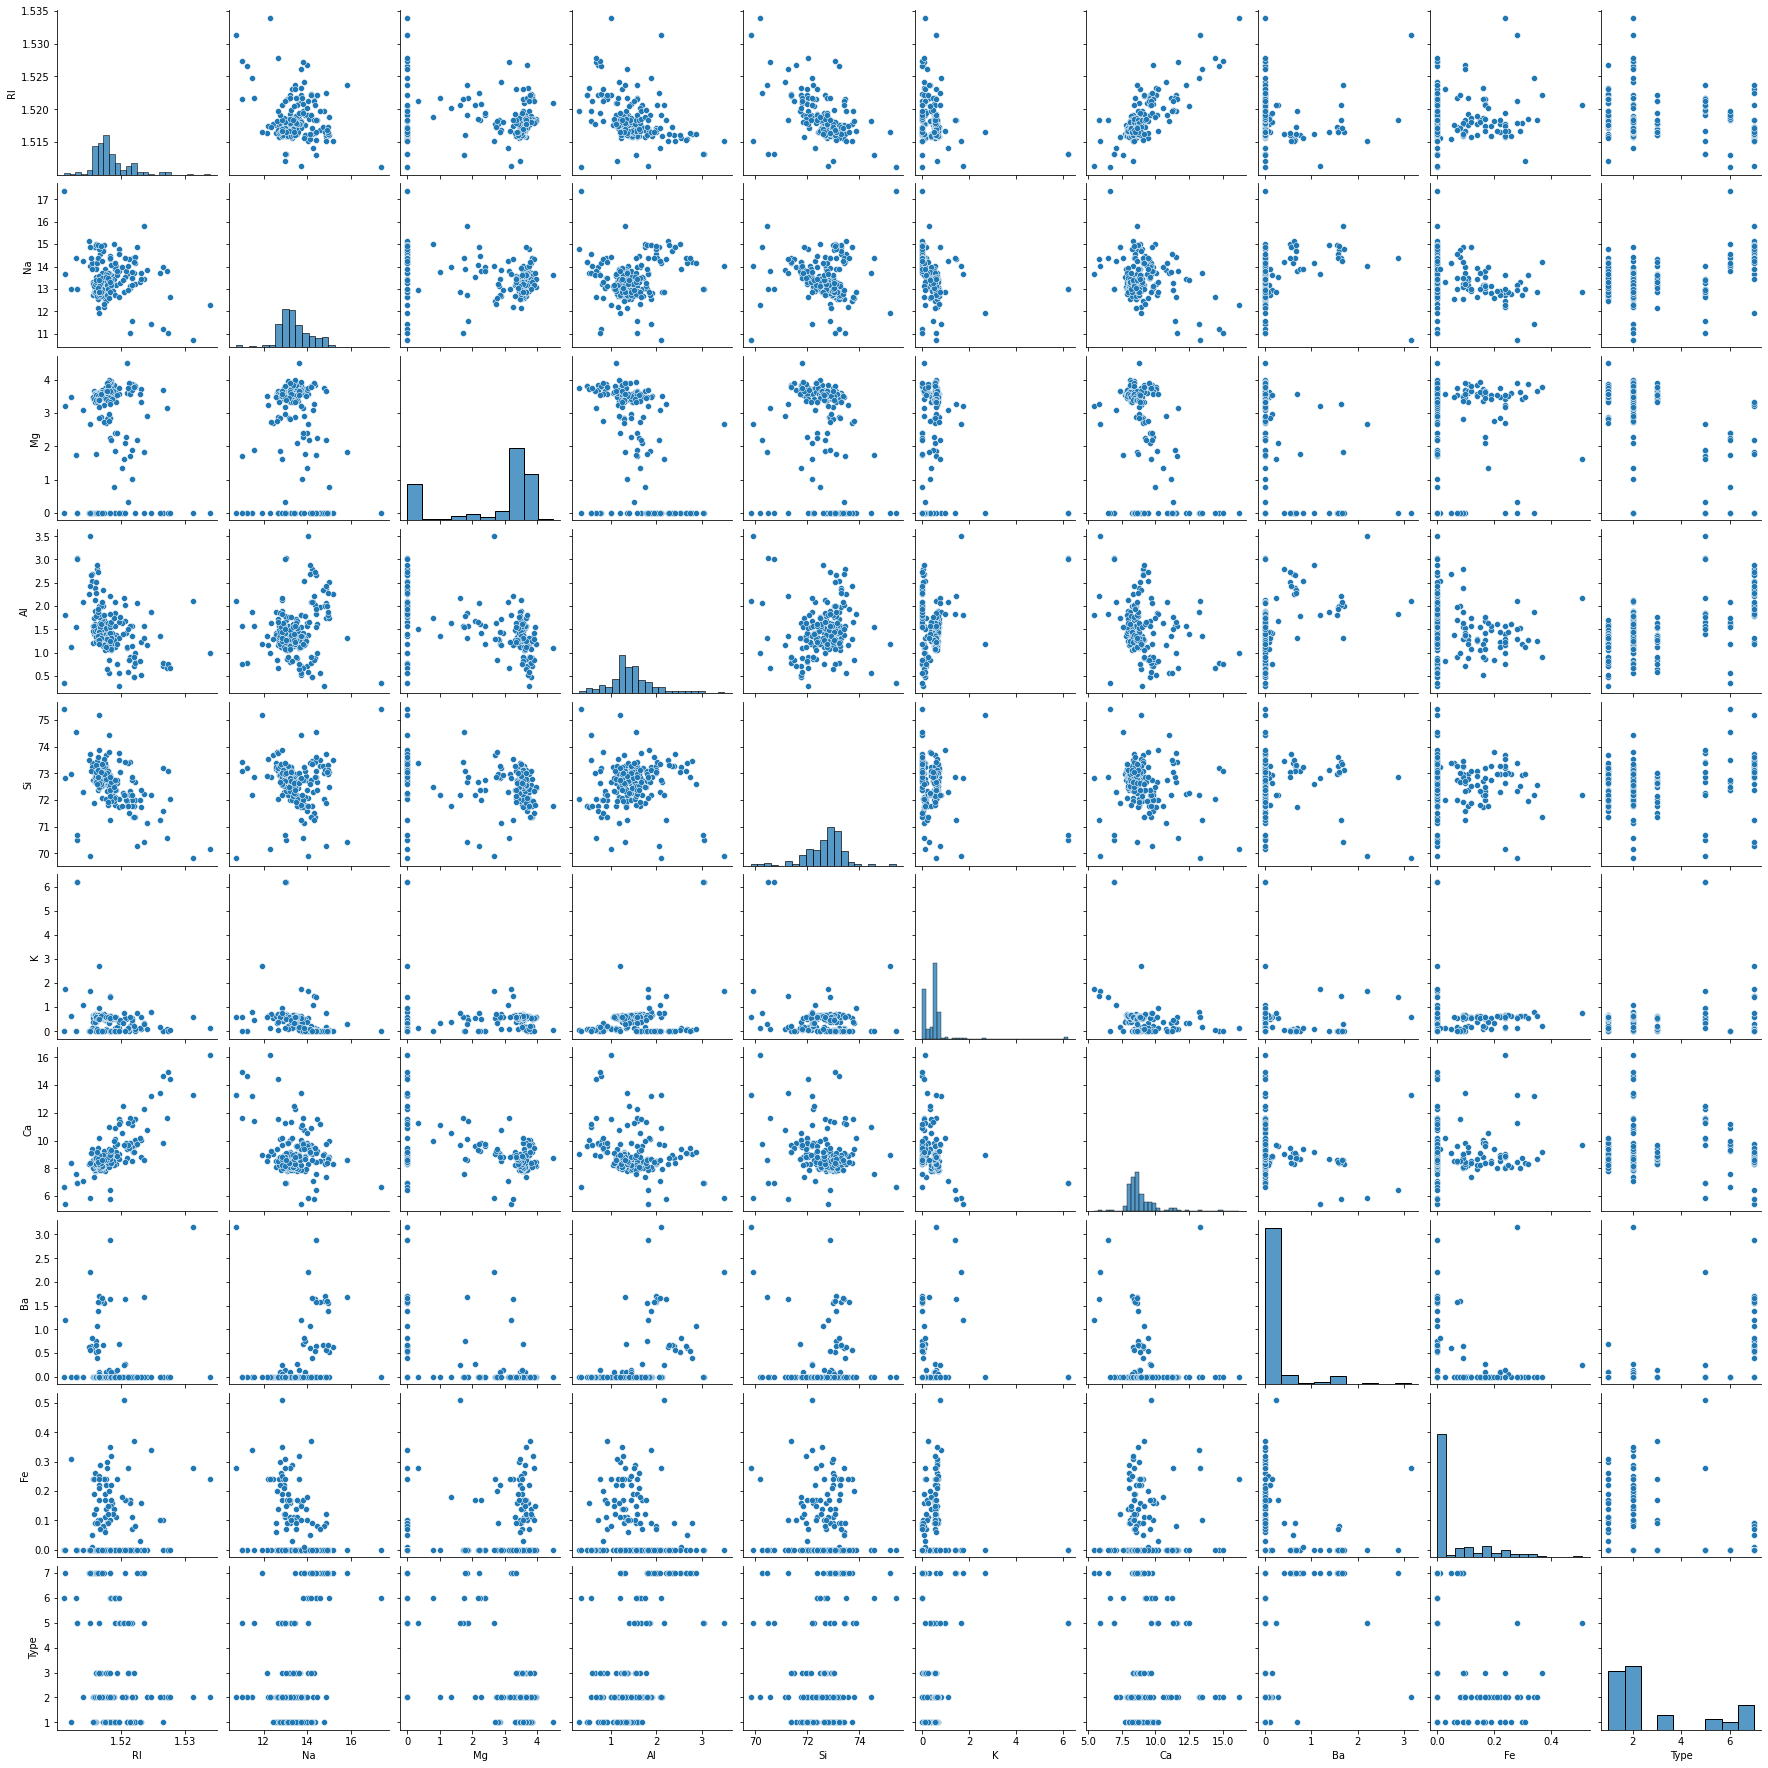

In [8]:
# Checking the pairplot.
sns.pairplot(data)
plt.show()

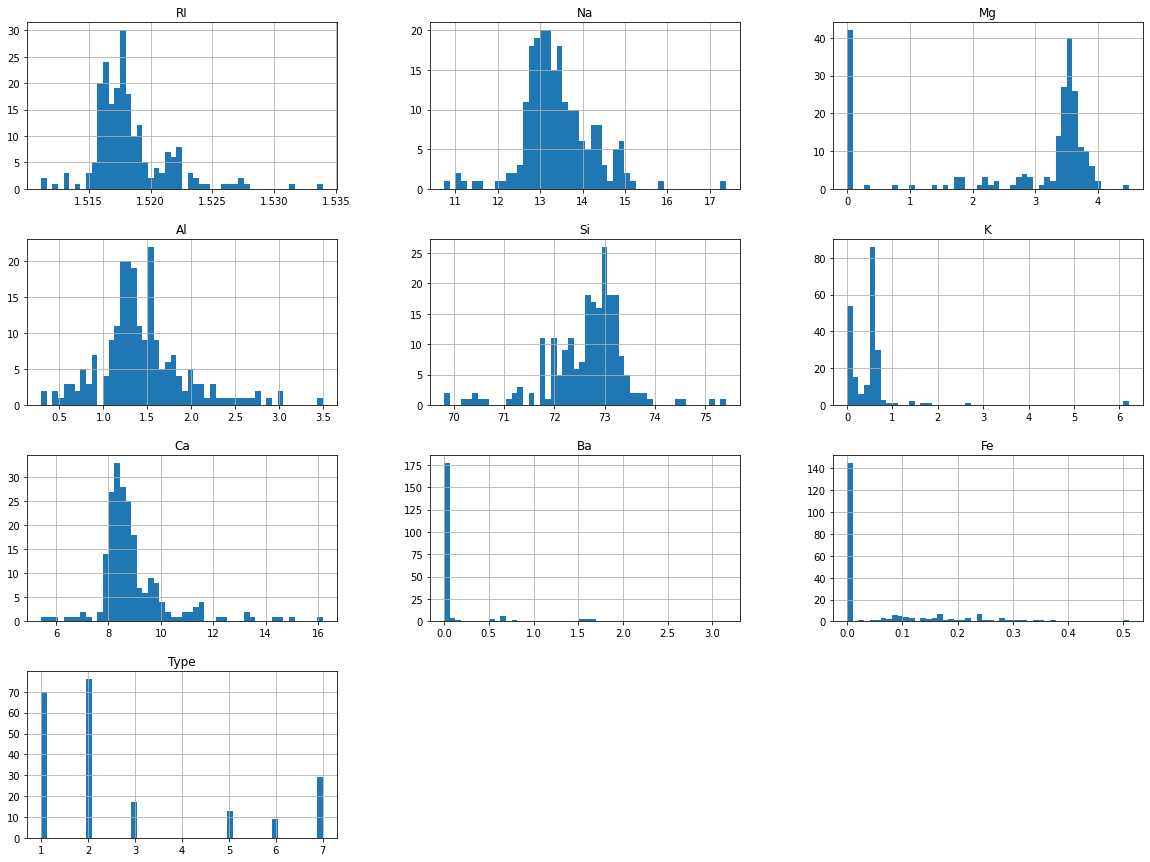

In [9]:
# Hists
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [12]:
to_drop = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X, y = data[to_drop].copy(), data['Type'].copy()
y[y<=2] = 0
y[y > 2] = 1
print(X.shape, y.shape)

(214, 9) (214,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [16]:
log_reg.classes_

array([0, 1], dtype=int64)

In [17]:
print(log_reg.predict(X_test))

[0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 1 0]


In [18]:
accuracy_score(y_test, log_reg.predict(X_test))

0.9069767441860465

In [19]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.94      0.83      0.88        18

    accuracy                           0.91        43
   macro avg       0.91      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



In [20]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [21]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def hypothesis(X, theta):
    h = sigmoid(np.dot(X, theta))
    return h

In [24]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    temp = hypothesis(X, theta)
    J = np.sum(-y*np.log(temp) + (1 - y)*np.log(1 - temp)) / m
    return J

In [25]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = X.T.dot(hypothesis(X,theta) - y)/m
    return d_theta

In [26]:
def gradient_descent(X, y, theta, alpha = 0.01, eps = 0.00001, numiters = 1500, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    i = 0
    while (True):
        theta = theta - alpha * derivative_theta(X, y, theta)
        J = cost_function(X, y, theta)
        J_history.append(J)
        i+=1
        if print_J == True:
            print(J)
        if (abs(J - J_history[-2]) < eps):
            break
        
    return theta, J_history

In [27]:
def predict(X, mean, std, theta):
    predictions = hypothesis(prepare_X((X-mean.values)/std.values),theta)
    ctr = 0.5
    predictions[predictions < ctr] = 0
    predictions[predictions > ctr] = 1
    return predictions

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00


In [29]:
X_new, mean, std = normalize(X_train)

In [30]:
X_new = prepare_X(X_new)
y_new=y_train.to_numpy();
y_new = y_new.reshape((X_new.shape[0], 1))

In [31]:
theta = np.zeros((X_new.shape[1], 1))

In [32]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 1000000, False)
print(new_theta)

[[-0.9934991 ]
 [-0.39730865]
 [ 0.67679526]
 [-0.94003147]
 [ 0.57066271]
 [ 0.01748349]
 [ 0.16963957]
 [ 0.20151248]
 [ 0.33571816]
 [-0.3133917 ]]


In [33]:
accuracy_score(y_test, predict(X_test, mean, std, new_theta))

0.8837209302325582

In [34]:
print(classification_report(y_test, predict(X_test, mean, std, new_theta)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.93      0.78      0.85        18

    accuracy                           0.88        43
   macro avg       0.90      0.87      0.88        43
weighted avg       0.89      0.88      0.88        43



In [35]:
accuracy_score(y_test, log_reg.predict(X_test))

0.9069767441860465

In [36]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.94      0.83      0.88        18

    accuracy                           0.91        43
   macro avg       0.91      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43

